# 0.0 Imports

In [1]:
import numpy              as np
import pandas             as pd
import seaborn            as sns
import plotly.express     as px
import matplotlib.pyplot  as plt
import ipywidgets         as widgets

import folium
import geopandas

from datetime             import datetime
from streamlit_folium     import folium_static
from folium.plugins       import MarkerCluster
from IPython.core.display import HTML
from IPython.display      import Image
from ipywidgets           import fixed

## 0.1 Helper Functions

In [2]:
def personal_settings():
    
    ## plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 8
    
    ## notebook settings
    display(HTML('<style>.container{width:98% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    ## seaborn settings
    sns.set(rc={'figure.figsize':(22,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.2)

In [3]:
personal_settings();

## 0.2 Loading Data

In [4]:
df_raw = pd.read_csv('datasets/kc_house_data.csv')

# 1.0 Data Description

In [5]:
df1 = df_raw.copy()
df1.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

## 1.1 Rename Columns

In [6]:
print(df1.columns)

df1 = df1.rename(columns={'price': 'buying_price'})

df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Index(['id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.2 Data Dimensions

In [7]:
print(df1.shape[0], 'rows')
print(df1.shape[1], 'columns')

21613 rows
21 columns


## 1.3 Data Types

In [8]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].dtypes,
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=description, columns=['attributes','dtypes', 'nunique','sample'])

attributes   dtypes  nunique                              sample
0              id    int64    21436            [4136890260, 4312700200]
1            date   object      372  [20150220T000000, 20141224T000000]
2    buying_price  float64     4028               [1101000.0, 182568.0]
3        bedrooms    int64       13                              [8, 3]
4       bathrooms  float64       30                          [4.0, 7.5]
5     sqft_living    int64     1038                        [3223, 6390]
6        sqft_lot    int64     9782                       [35280, 7930]
7          floors  float64        6                          [2.0, 3.5]
8      waterfront    int64        2                              [0, 1]
9            view    int64        5                              [2, 1]
10      condition    int64        5                              [2, 4]
11          grade    int64       12                              [6, 1]
12     sqft_above    int64      946                         [900, 2229]
13  sqft_basement    int64      306                          [60, 2080]
14       yr_built    int64      116                        [1999, 1967]
15   yr_renovated    int64       70                        [2006, 1974]
16        zipcode    int64       70                      [98008, 98108]
17            lat  float64     5034                  [47.3329, 47.7213]
18           long  float64      752                [-121.922, -122.171]
19  sqft_living15    int64      777                        [2810, 1092]
20     sqft_lot15    int64     8689                      [10609, 64441]

## 1.4 Check NA

In [9]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

attributes  null  %null
0              id     0      0
1            date     0      0
2    buying_price     0      0
3        bedrooms     0      0
4       bathrooms     0      0
5     sqft_living     0      0
6        sqft_lot     0      0
7          floors     0      0
8      waterfront     0      0
9            view     0      0
10      condition     0      0
11          grade     0      0
12     sqft_above     0      0
13  sqft_basement     0      0
14       yr_built     0      0
15   yr_renovated     0      0
16        zipcode     0      0
17            lat     0      0
18           long     0      0
19  sqft_living15     0      0
20     sqft_lot15     0      0

## 1.5 Fillout NA

In [10]:
## nothing to fill

## 1.6 Change Data Types

In [11]:
## changing 'date' type from OBJECT to DATE
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

## checking 'date' type
display(df1[['date']].head())
display(df1[['date']].dtypes)

date
0 2014-10-13
1 2014-12-09
2 2015-02-25
3 2014-12-09
4 2015-02-18

date    datetime64[ns]
dtype: object

## 1.7 Check Duplicates

In [12]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.duplicated('id').sum(), '  duplicate ids')

21613 number of rows
21436 uniques ids
177   duplicate ids


## 1.8 Drop Duplicates

In [13]:
## sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

## deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.duplicated('id').sum(), '    duplicate ids')

21436 number of rows
21436 uniques ids
0     duplicate ids


## 1.9 Descriptive Statistical

In [14]:
qnt1_attributes = df1[['buying_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']]
cat1_attributes = df1[['date', 'yr_built', 'yr_renovated', 'waterfront', 'view', 'condition', 'grade','zipcode']]

### 1.9.1 Quantitative Attributes

In [15]:
## count, mean, std, min, quartile 1 (25%), quartile 2(50%), quartile 3 (75%) and max
qnt1_attributes.describe().T

count      mean       std      min       25%       50%  \
buying_price  21436.00 541649.96 367314.93 75000.00 324866.00 450000.00   
bedrooms      21436.00      3.37      0.93     0.00      3.00      3.00   
bathrooms     21436.00      2.12      0.77     0.00      1.75      2.25   
sqft_living   21436.00   2082.70    919.15   290.00   1430.00   1920.00   
sqft_lot      21436.00  15135.64  41538.62   520.00   5040.00   7614.00   
floors        21436.00      1.50      0.54     1.00      1.00      1.50   
sqft_above    21436.00   1790.96    829.03   290.00   1200.00   1560.00   
sqft_basement 21436.00    291.74    442.78     0.00      0.00      0.00   
sqft_living15 21436.00   1988.31    685.70   399.00   1490.00   1840.00   
sqft_lot15    21436.00  12785.96  27375.47   651.00   5100.00   7620.00   
lat           21436.00     47.56      0.14    47.16     47.47     47.57   
long          21436.00   -122.21      0.14  -122.52   -122.33   -122.23   

                    75%        max  
buying_price  645000.00 7700000.00  
bedrooms           4.00      33.00  
bathrooms          2.50       8.00  
sqft_living     2550.00   13540.00  
sqft_lot       10696.25 1651359.00  
floors             2.00       3.50  
sqft_above      2220.00    9410.00  
sqft_basement    560.00    4820.00  
sqft_living15   2370.00    6210.00  
sqft_lot15     10087.25  871200.00  
lat               47.68      47.78  
long            -122.12    -121.31

### 1.9.2 Categorical Attributes

The qualitative attributes yr_built, yr_renovated, view, condition, grade and zipcode are ordinal, i.e. they express some sort of ordering.

In [16]:
## min, max, uniques, mode and mode frequency
min_value = pd.DataFrame(cat1_attributes.apply(np.min)).rename(columns = {0: 'min'}).astype(str)
max_value = pd.DataFrame(cat1_attributes.apply(np.max)).rename(columns = {0: 'max'}).astype(str)

cat1_summary = cat1_attributes.astype('category').describe().T.drop(columns = 'count').rename(columns = {'top': 'mode', 'freq': 'mode freq'}).astype(str)
cat1_summary = pd.concat([min_value, max_value, cat1_summary], axis=1)
cat1_summary

min                  max unique  \
date          2014-05-02 00:00:00  2015-05-27 00:00:00    372   
yr_built                     1900                 2015    116   
yr_renovated                    0                 2015     70   
waterfront                      0                    1      2   
view                            0                    4      5   
condition                       1                    5      5   
grade                           1                   13     12   
zipcode                     98001                98199     70   

                             mode mode freq  
date          2014-06-23 00:00:00       142  
yr_built                     2014       559  
yr_renovated                    0     20526  
waterfront                      0     21273  
view                            0     19320  
condition                       3     13911  
grade                           7      8896  
zipcode                     98103       600

# 2.0 Data Filtering

In [17]:
df2 = df1.copy()

### 2.1 Check for filtering

Check bedrooms and bathrooms.

In [18]:
display(df2[['bedrooms', 'bathrooms']].describe())

bedrooms  bathrooms
count  21436.00   21436.00
mean       3.37       2.12
std        0.93       0.77
min        0.00       0.00
25%        3.00       1.75
50%        3.00       2.25
75%        4.00       2.50
max       33.00       8.00

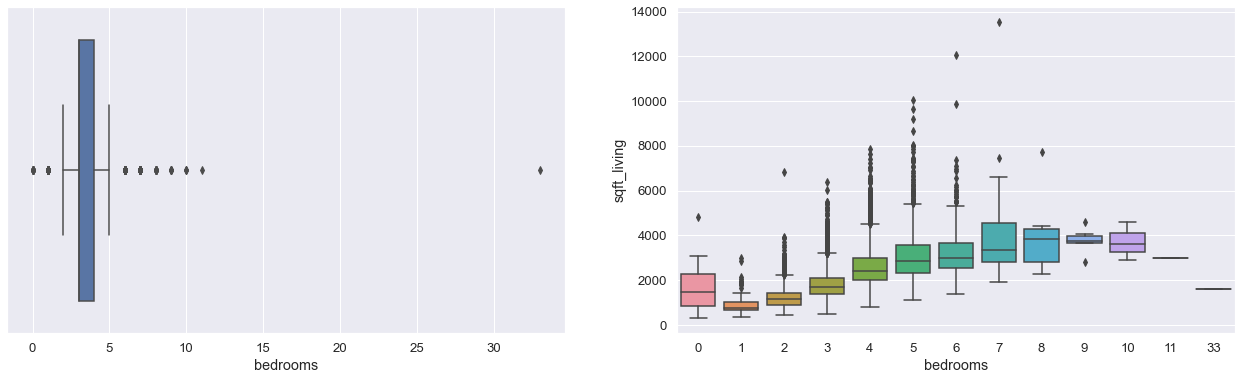

In [19]:
plt.figure(figsize=(22, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'bedrooms',  data=df2)

plt.subplot(1,2,2)
sns.boxplot(x = 'bedrooms', y='sqft_living', data=df2);

There is just one property with a bedroom equal to 33. The property has a small area to have 33 bedrooms.   
There is only one property with 11 bedrooms. The property has an area of 3000 square feet. Although it is unusual, it is possible for a property of this size to have 11 bedrooms.

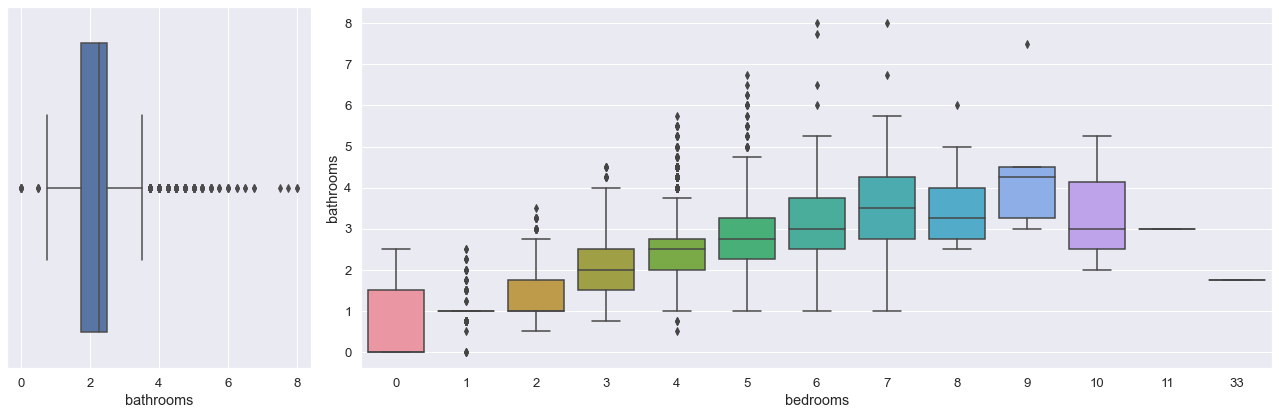

In [20]:
## specify plot layouts with different width using subplots()
fig, axs = plt.subplots(1,2, figsize=(18, 6), gridspec_kw=dict(width_ratios=[1,3]))

sns.boxplot(x = 'bathrooms',  data=df2, ax=axs[0])
sns.boxplot(x = 'bedrooms', y='bathrooms', data=df2, ax=axs[1])

fig.tight_layout()
plt.show()

For bathrooms, 0.5 is a room with a toilet but no shower, 0.75 is a bathroom that has either a shower or tub with sink and toilet, and 1 a bathroom that has shower and tub with sink and toilet (https://www.badeloftusa.com/buying-guides/bathrooms).       
Properties with bathrooms less than 0.75 were considered commercial properties. The house rocket company only works with residential properties.    
There are some properties with zero bedrooms, but bathrooms more than 0.75. These properties were considered residential properties studio-type.

### 2.2 Data Filtering

In [21]:
df2 = df2[(df2['bathrooms'] >= 0.75) & (df2['bedrooms'] != 33)]

## checking the filtering
print(f"Min. number of bathrooms: {df2['bathrooms'].min()}")
print(f"Max. number of bedrooms : {df2['bedrooms'].max()}")

Min. number of bathrooms: 0.75
Max. number of bedrooms : 11


# 3.0 Feature Engineering

In [22]:
df3 = df2.copy()

## 3.1 Mind Map

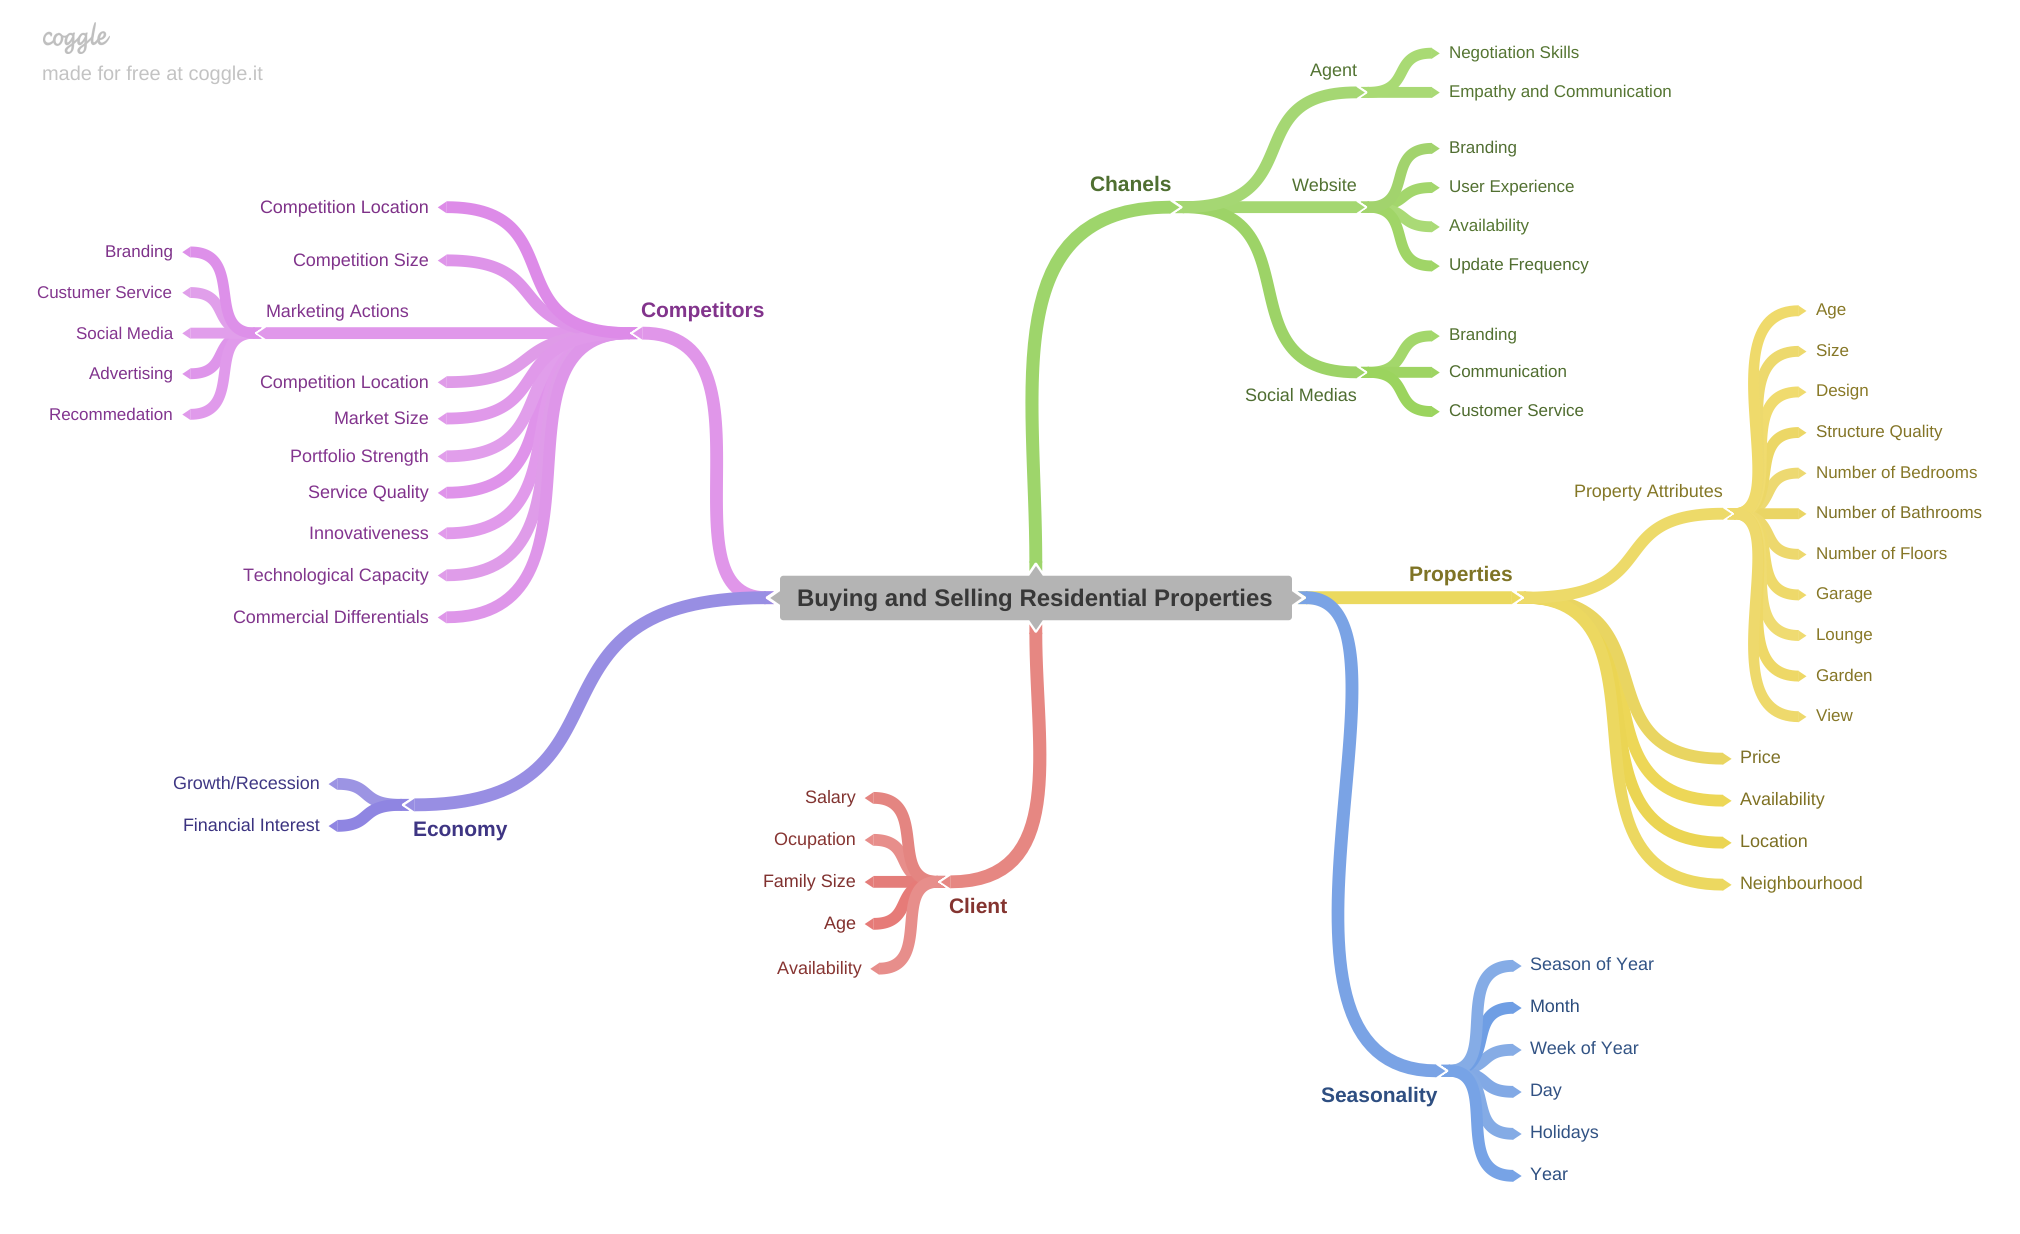

In [23]:
Image('images/mind_map.png')

## 3.2 Hypotesis List

**H1**. At the median, waterfront properties are 50% more expensive than non-waterfront properties.     
**H2**. At the median, properties with good views that are not in good condition are at least 25% more expensive than properties that do not have good view that are in good condition.    
**H3**. At the median, older properties are at least 35% cheaper than newer properties.   
**H4**. On averange, with every bedroom, the value of the properties rises 10%.   
**H5**. At the median, properties without a basement have a lot area at least 20% bigger than those with a basement.    
**H6**. At the median, properties without a basement are at least 15% cheaper than those with a basement.   
**H7**. Properties built with basement decreased after the 90s.   
**H8**. The living space of the properties increased over construction year timeline.    
**H9**. The best seasons to sell a property are spring and summer.   

## 3.3 Features Creation

Since we have filtered our data, let's describe the price after filtering to create the price_bins feature.

In [24]:
df3['buying_price'].describe()

count     21421.00
mean     541745.83
std      367313.63
min       78000.00
25%      324950.00
50%      450500.00
75%      645000.00
max     7700000.00
Name: buying_price, dtype: float64

The mean value is greater than the median. This is an indication that the variable is positively skewed. To better represent the central tendency, we will use the median as to create the price_bins feature.

In [25]:
## price bins by median
df3['price_bins'] = df3['buying_price'].apply(lambda x: 'under_median' if x < 450500 else'from_median_upward')

## seasons of the year
def get_season(date):
    year = int(date.year)
    seasons = {'spring':(datetime(year,3,21), datetime(year,6,20)),
               'summer':(datetime(year,6,21), datetime(year,9,22)),
               'autumn':(datetime(year,9,23), datetime(year,12,20))}
    
    for season,(season_start, season_end) in seasons.items():
        if date >= season_start and date <= season_end:
            return season
    else:
        return 'winter'

df3['season'] = df3['date'].apply( get_season ).astype(str)

## price per square foot built
df3['price_sqft'] = df3[['buying_price', 'sqft_living']].apply(lambda x: x['buying_price']/x['sqft_living'], axis=1).astype(np.int64)

## if property is newer
df3['newer'] = df3['yr_built'].apply(lambda x: 1 if x >= 1965 else 0).astype(np.int64)

## if property was basement
df3['basement'] = df3['sqft_basement'].apply(lambda x: 1 if x != 0 else 0).astype(np.int64)

## if property was renovated
df3['renovated'] = df3['yr_renovated'].apply(lambda x: 1 if x != 0 else 0).astype(np.int64)

In [26]:
df3[['date', 'season', 'buying_price', 'price_bins','sqft_living', 'price_sqft', 'yr_built', 'newer', 'sqft_basement', 'basement', 'yr_renovated', 'renovated']].sample(5)

date  season  buying_price          price_bins  sqft_living  \
1402 2014-09-05  summer     280000.00        under_median          910   
6540 2015-05-07  spring     598200.00  from_median_upward         2980   
1935 2015-04-14  spring    1249000.00  from_median_upward         3190   
1916 2014-10-17  autumn     500000.00  from_median_upward         1530   
6931 2015-01-29  winter     532000.00  from_median_upward         1830   

      price_sqft  yr_built  newer  sqft_basement  basement  yr_renovated  \
1402         307      1942      0              0         0             0   
6540         200      1997      1              0         0             0   
1935         391      1912      0            780         1             0   
1916         326      1972      1              0         0             0   
6931         290      1987      1              0         0             0   

      renovated  
1402          0  
6540          0  
1935          0  
1916          0  
6931          0

# 4.0 Exploratory Data Analysis

In [27]:
df4 = df3.copy()

In [28]:
qnt2_attributes = df4[['buying_price', 'price_sqft', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']]
cat2_attributes = df4[['price_bins', 'date', 'season', 'zipcode', 'yr_built', 'newer', 'renovated', 'yr_renovated', 'basement', 'waterfront', 'view', 'condition', 'grade']]

## 4.1 Univariate Analysis

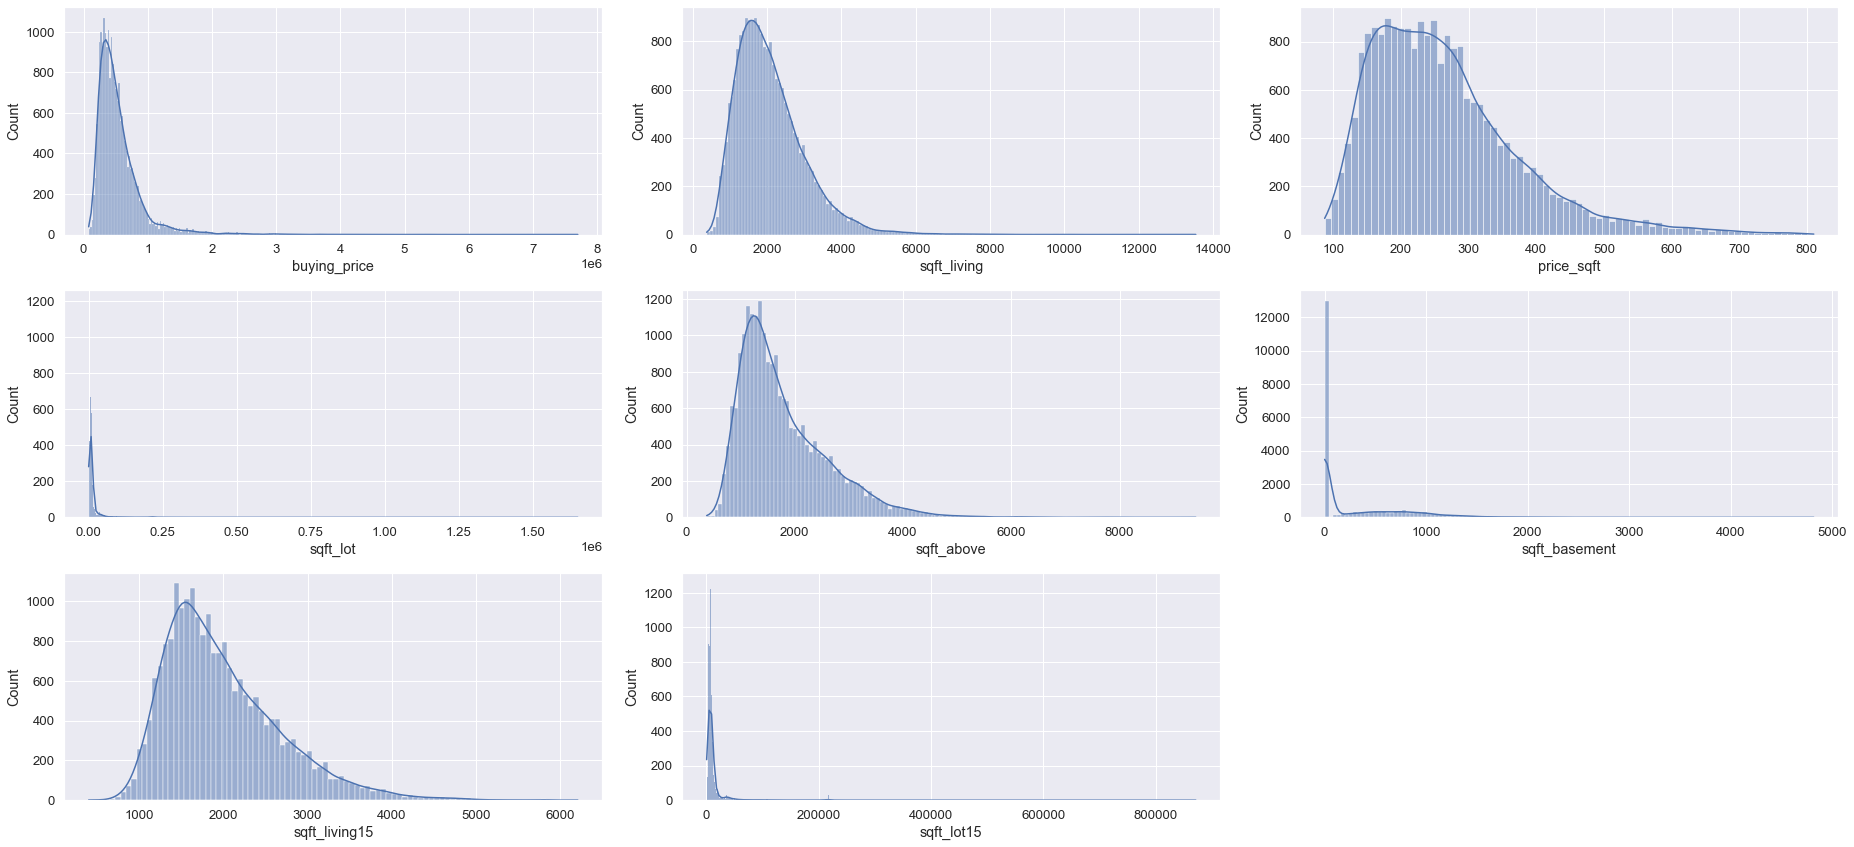

In [29]:
## histplots - 'buying_price', 'age', 'sqft_living', 'price_sqft', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15' and 'sqft_lot15'

cols = 3
rows = 3
num_cols = qnt2_attributes[['buying_price', 'sqft_living', 'price_sqft', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
fig = plt.figure(figsize= (26, 12))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.histplot(x=qnt2_attributes[col], kde=True, ax=ax)
    
fig.tight_layout()  
plt.show()

When looking at the distribution, we see that all the variables have a bit of rightward asymmetry, i.e., the lower values are more frequent. This asymmetry is a little greater for sqft_lot, sqft_lot15, and price.

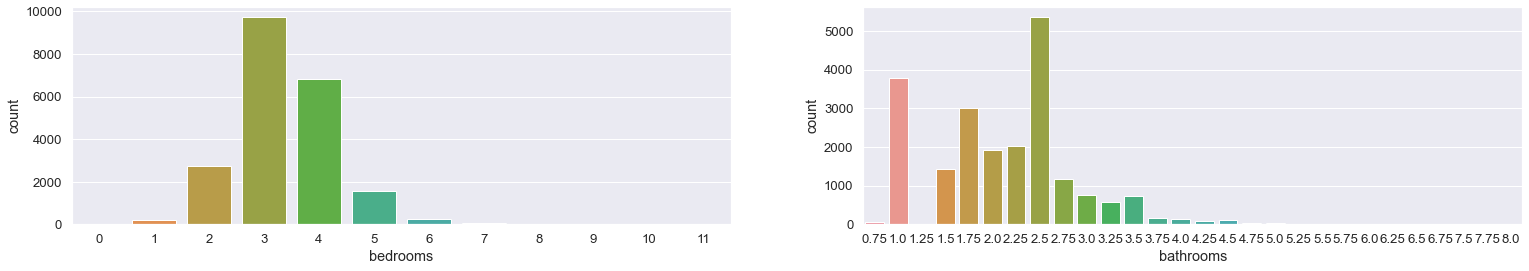

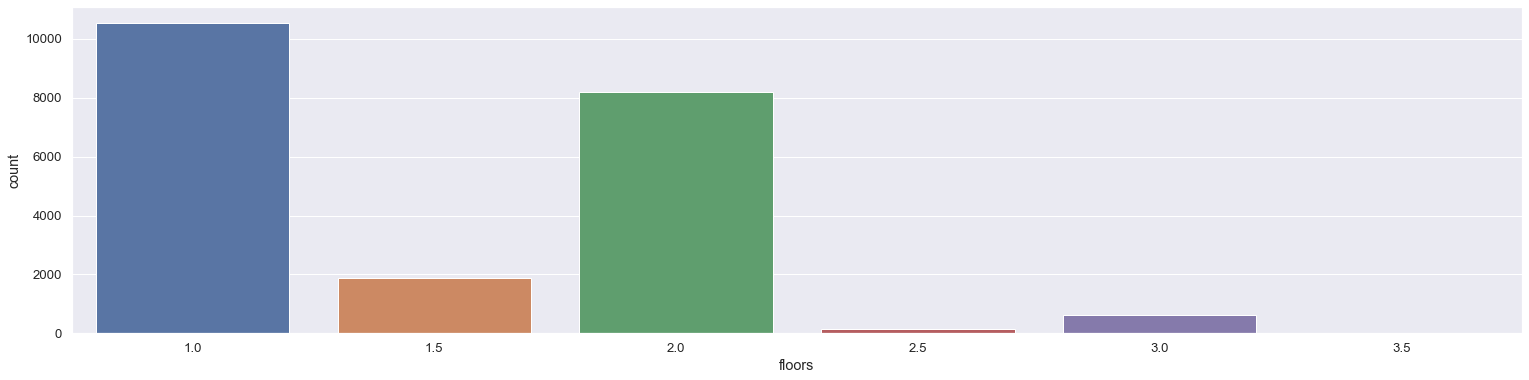

In [30]:
## countplot  - bedrooms, bathrooms and floors
plt.figure(figsize=(26, 4))

plt.subplot(1,2,1)
sns.countplot(x = 'bedrooms', data=df4)

plt.subplot(1,2,2)
sns.countplot(x = 'bathrooms', data=df4);

plt.figure(figsize=(26, 6))
sns.countplot(x = 'floors', data=df4);

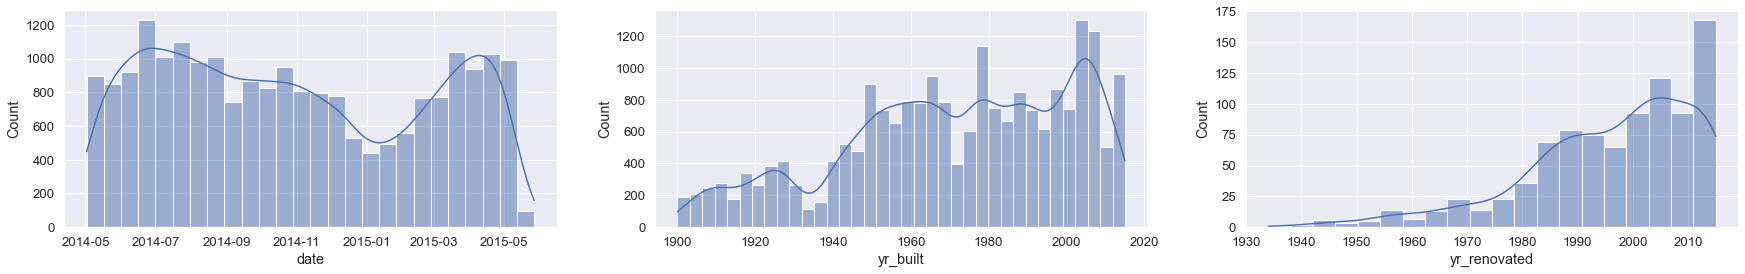

In [31]:
## histplot - date, yr_built, yr_renovated
plt.figure(figsize=(30, 4))

plt.subplot(1, 3, 1)
sns.histplot(x='date', kde=True, data=df4)

plt.subplot(1, 3, 2)
sns.histplot(x='yr_built', kde=True, data=df4)

# having a look, just in the distribution for properties that have being renovated
aux1 = df4[df4['yr_renovated'] > 0][['id', 'yr_renovated']]

plt.subplot(1, 3, 3)
sns.histplot(x = 'yr_renovated', kde=True, data=aux1);

For the data available, most properties are available in spring/summer (March 21 to September 22). We should point out that we don't have enough year-to-year data to state that this is a long-term trend, the dataset goes from 05/02/014 to 05/27/2015.   
Most properties were built after 1960, with a high point just after 2000.   
As for properties that have been renovated, most renovations were done after 1990. This is to be expected, as most properties were built after 1960.

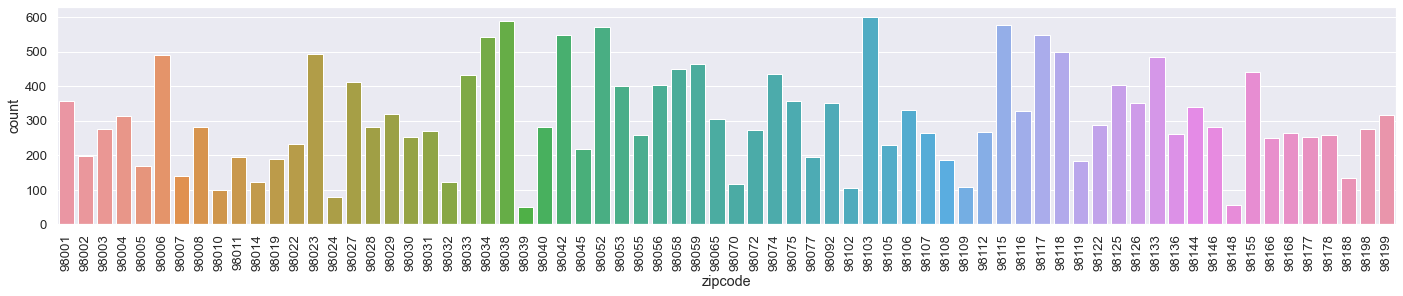

In [32]:
## countplot  - zipcode
plt.figure(figsize=(24, 4))

sns.countplot(x='zipcode', data=df4)
plt.xticks(rotation=90);

In [33]:
## portfolio density code (github can't load folium maps)
#
#  density_map = folium.Map(location=[df4['lat'].mean(), df4['long'].mean()], defaut_zoom_start=15)
#
#  folium.Map()
#
#  marker_cluster = MarkerCluster().add_to(density_map)
#
#  for name, row in df4.iterrows():
#      folium.Marker([row['lat'], row['long']], 
#                    popup=(f"ZIPCODE {row['zipcode']}")).add_to(marker_cluster)
#
#  density_map

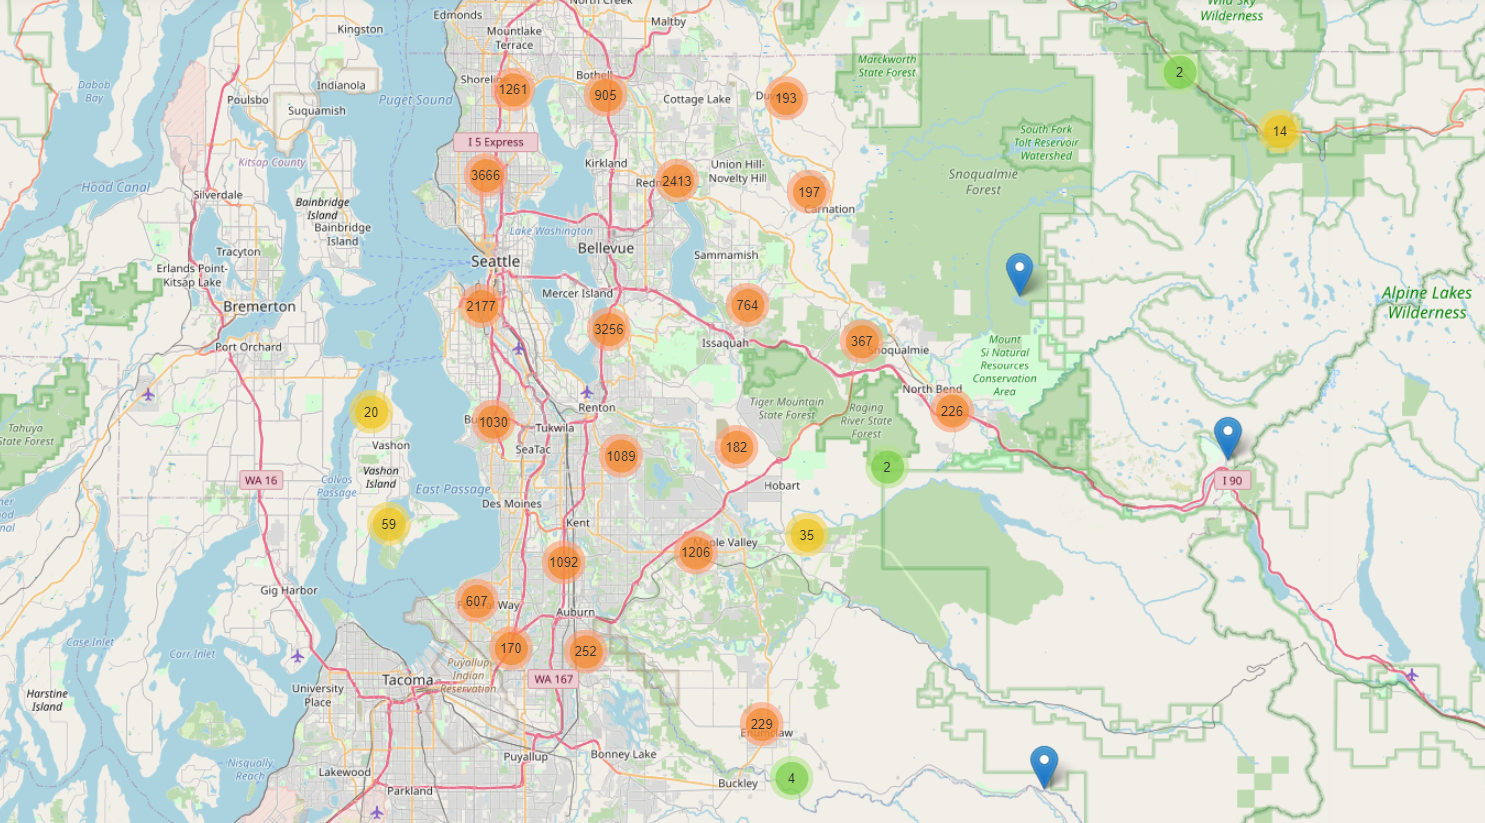

In [34]:
## portfolio density
Image('images/portfolio_density.png')

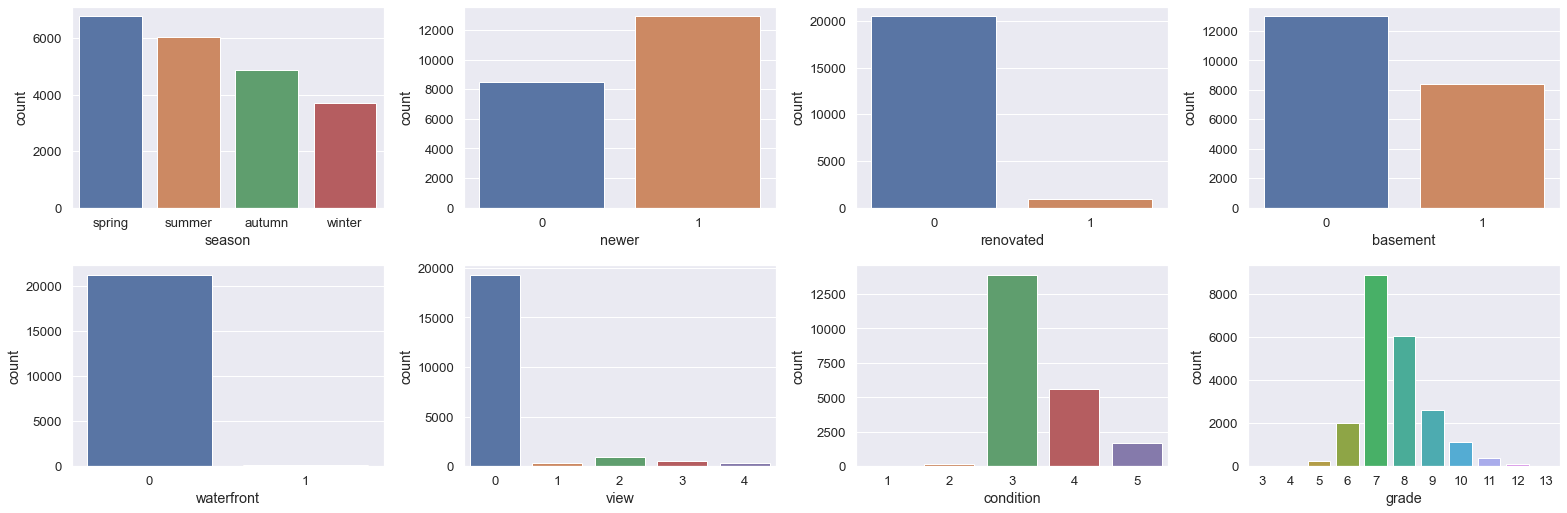

In [35]:
## countplots - season, old, renovated, basement, waterfront, view, condition and grade

cols = 4
rows = 4
num_cols = cat2_attributes[['season',  'newer', 'renovated', 'basement', 'waterfront', 'view', 'condition', 'grade']]
fig = plt.figure(figsize= (22, 14))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.countplot(x=cat2_attributes[col], ax=ax)
    
fig.tight_layout()  
plt.show()

* Looking, just the season feature, more properties become available in the spring/summer than in the autumn/winter. We must consider that the dataset ranges from 2014-05-02 to 2015-05-27, and some seasons are included in the dataset twice and others once.
* It was expected that there would be more properties that have never been renovated than properties that have been renovated, since most properties were built after 1960.   
* There are more properties without basement, than with basement.  
* The vast majority of properties do not is waterfront, do not have a good view, and are in good condition or up.      
* Most of the properties have a good level of construction and design.  

## 4.2 Bivariate Analysis

In [36]:
## price by zipcode code (github can't load folium maps)
#
#  def get_geofile(url):
#      geofile = geopandas.read_file(url)
#      return geofile
# 
## get geofile
#  url = 'https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'
#  geofile = get_geofile(url)
#
#
#  geofile = geofile[geofile['ZIP'].isin(df4['zipcode'].tolist())]
# 
#  region_price_map = folium.Map(location = [df4['lat'].mean(), df4['long'].mean()], defaut_zoom_start=15)
# 
#  folium.Choropleth(data = df4,
#                              geo_data = geofile, 
#                              columns = ['zipcode', 'buying_price'], 
#                              key_on = 'feature.properties.ZIP', 
#                              fill_color='YlOrRd', 
#                              fill_opacity = 0.7, 
#                              line_opacity = 0.2, 
#                              legend_name = 'Average Price (USD)' ).add_to(region_price_map)
# 
#  region_price_map

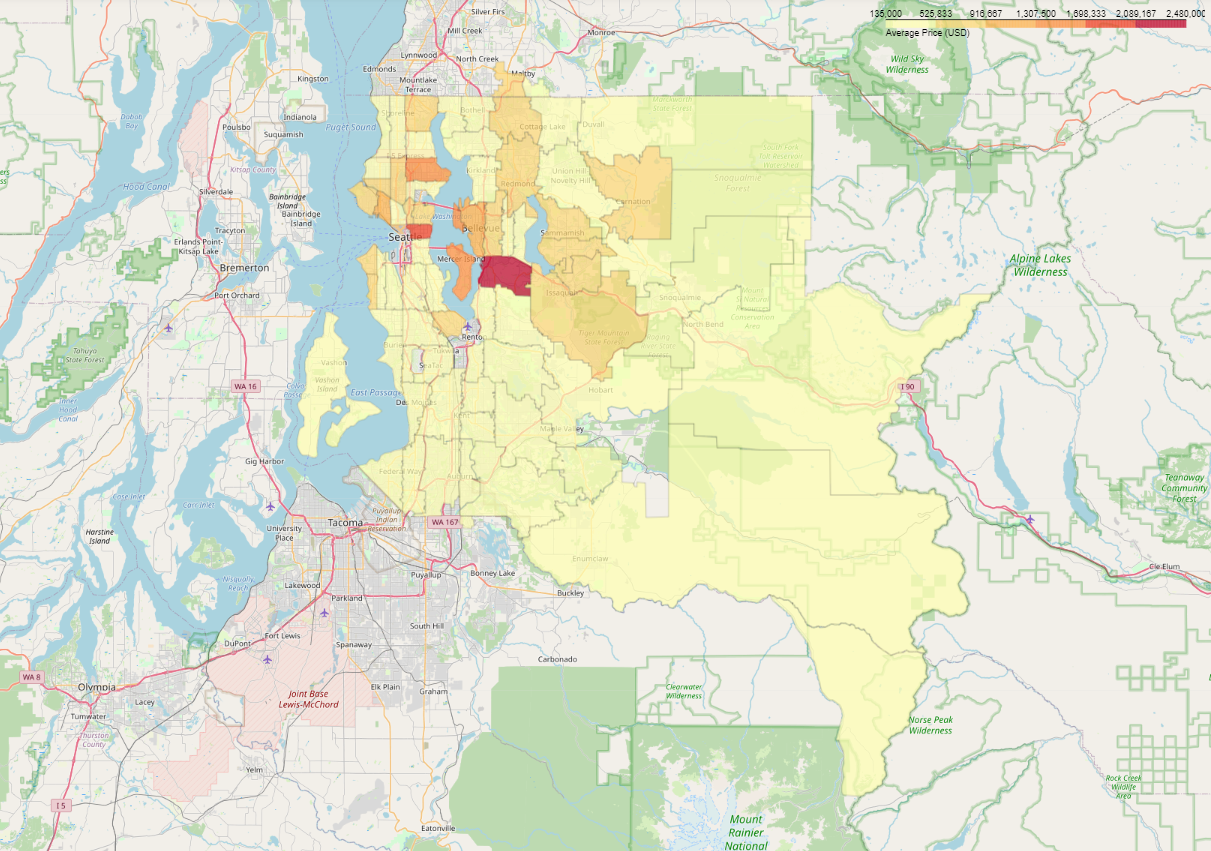

In [37]:
## price by zipcode
Image('images/price_density.png')

The regions near the major centers have the most properties priced above the median and larger. Properties near Lake Washington are generally priced well above the median.

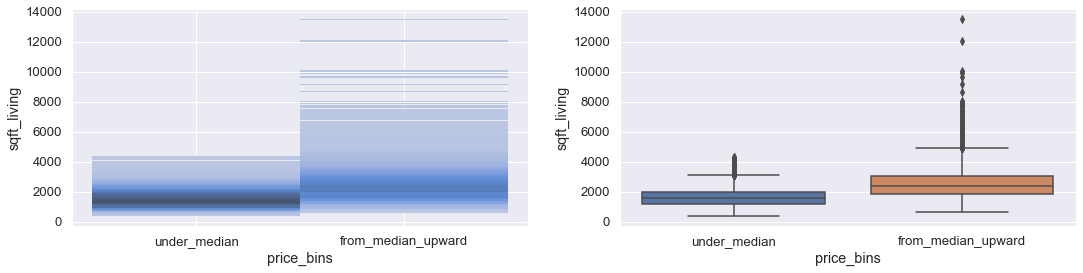

In [38]:
## price_bins x sqft_living
plt.figure(figsize=(18, 4))

plt.subplot(1,2,1)
sns.histplot(x='price_bins', y='sqft_living', data=df4)

plt.subplot(1,2,2)
sns.boxplot(x='price_bins', y='sqft_living', data=df4);

Properties under the median have a maximum built size just above 4000 sqft, with concentration around 1000 and 2000 sqft. For properties priced from the median upward, there is a much wider price range, with a concentration around 2000 and 3000 sqft.

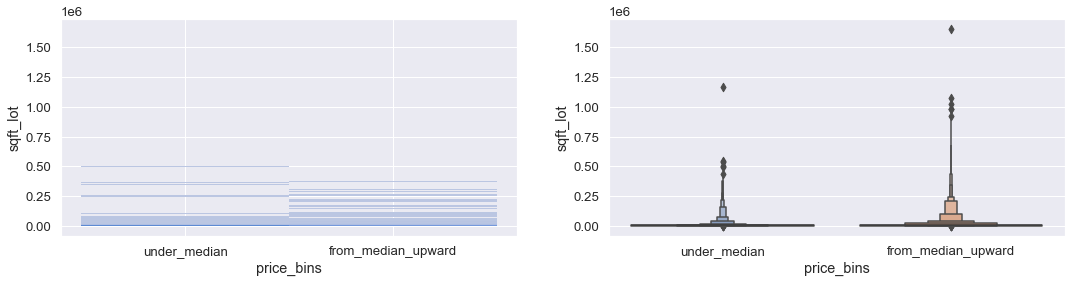

In [39]:
## price_bins x sqft_lot
plt.figure(figsize=(18, 4))

plt.subplot(1,2,1)
sns.histplot(x='price_bins', y='sqft_lot', data=df4)

plt.subplot(1,2,2)
sns.boxenplot(x='price_bins', y='sqft_lot', data=df4);

For both under median and from median upwards properties, there is not much variation in the sqft lot.

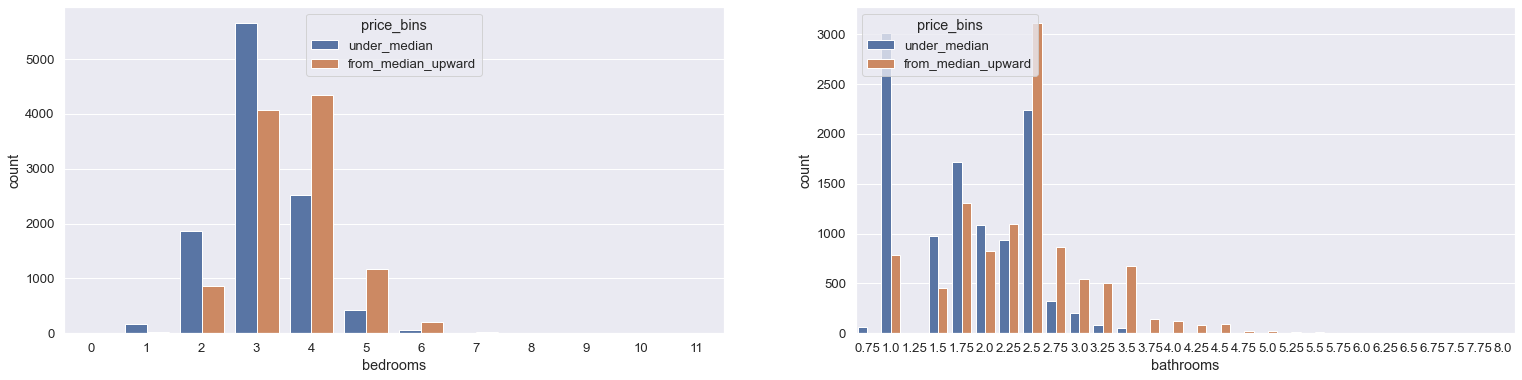

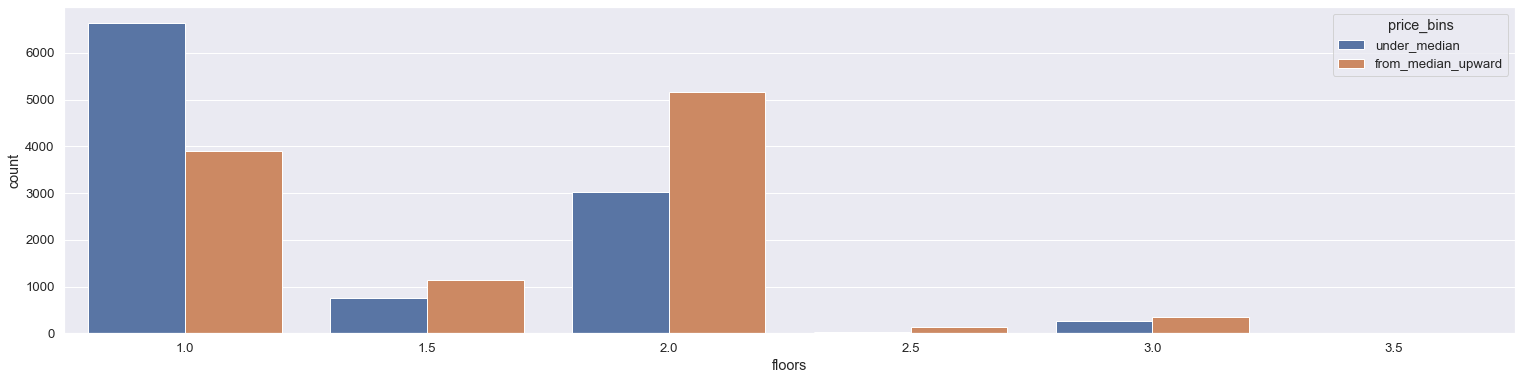

In [40]:
## bedrooms, bathrooms and floors X price_bins
plt.figure(figsize=(26, 6))

plt.subplot(1,2,1)
sns.countplot(x= 'bedrooms', hue='price_bins', data=df4)

plt.subplot(1,2,2)
sns.countplot(x= 'bathrooms', hue='price_bins', data=df4);

plt.figure(figsize=(26, 6))
sns.countplot(x= 'floors', hue='price_bins', data=df4);

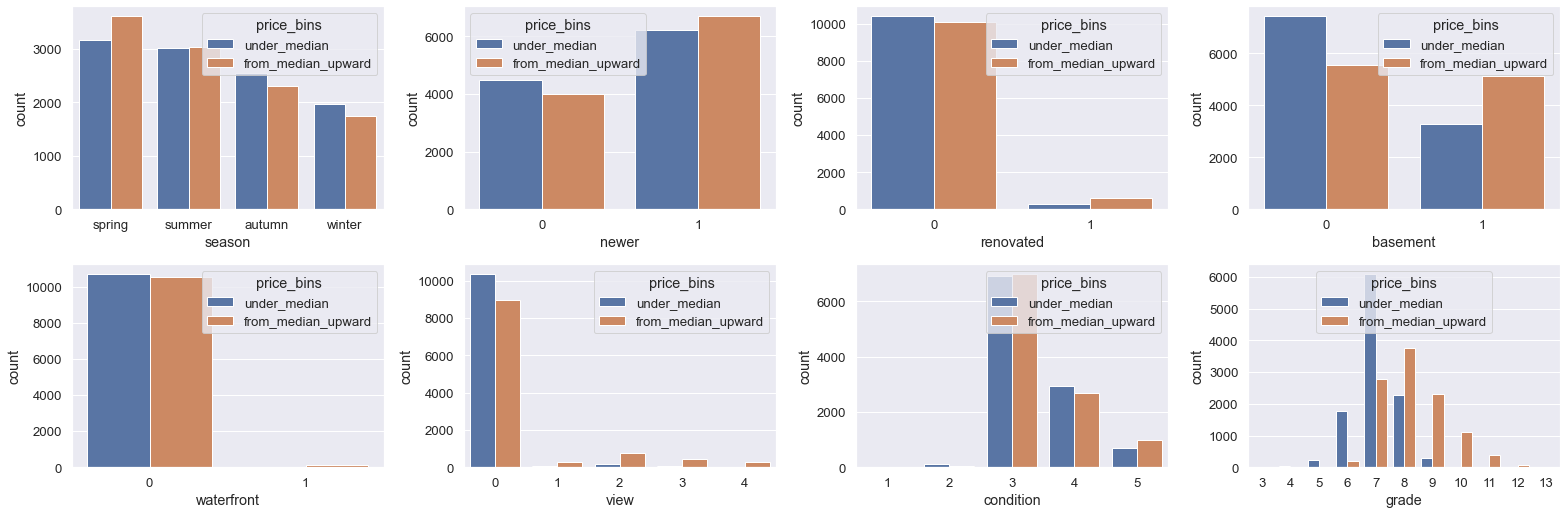

In [41]:
## season, old, renovated, basement, waterfront, view, condition and grade x price_bins

cols = 4
rows = 4
num_cols = df4[['season',  'newer', 'renovated', 'basement', 'waterfront', 'view', 'condition', 'grade']]
fig = plt.figure(figsize= (22, 14))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.countplot(x=cat2_attributes[col], hue=df4['price_bins'], ax=ax)
    
fig.tight_layout()  
plt.show()

### **H1**. At the median, waterfront properties are 50% more expensive than non-waterfront properties.    
**False**. Waterfront properties are 211.11% more expensive than non waterfront properties.    

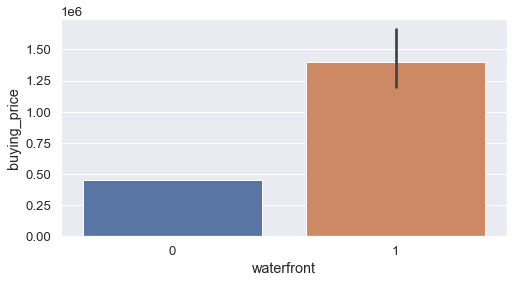

In [42]:
plt.figure(figsize=(8, 4))
sns.barplot(x='waterfront', y='buying_price', data=df4, estimator=np.median);

In [43]:
h1 = df4[['waterfront', 'buying_price']].groupby('waterfront').median().reset_index()
print(h1)

isnot_waterfront = h1.iloc[0,1]
is_waterfront = h1.iloc[1,1]

percentage = abs(((is_waterfront - isnot_waterfront) / isnot_waterfront)*100)
print(f'\nWaterfront properties are {percentage:.2f}% more expensive.')

   waterfront  buying_price
0           0     450000.00
1           1    1400000.00

Waterfront properties are 211.11% more expensive.


It was to be expected, considering the same region, that waterfront properties would cost more than without it. What was not expected was that the difference would be so big. Having the chance to buy waterfront, property for a low price allows you to practice a higher profit margin.

### **H2**. At the median, properties with good views that are not in good condition are at least 25% more expensive than properties that do not have good view that are in good condition.    
**True**. Properties with a good view that are not in good condition are 107.87% more expensive than properties that are not with a good view and that are in good condition.

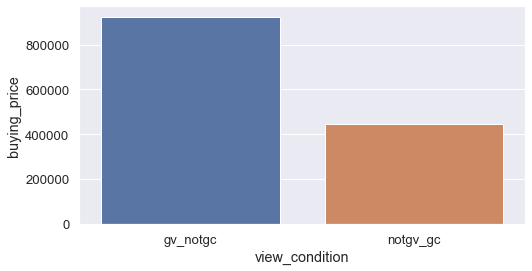

In [44]:
# good view: view >= 3
# good condition: condition >= 4

gv_notgc = df4[(df4['view'] >= 3) & (df4['condition'] <= 3)][['buying_price']].rename(columns={"buying_price": "gv_notgc"}).median()
notgv_gc = df4[(df4['view'] <  3) & (df4['condition'] >  3)][['buying_price']].rename(columns={"buying_price": "notgv_gc"}).median()

h2 = pd.concat([gv_notgc, notgv_gc]).reset_index()
h2.columns = ['view_condition','buying_price']

plt.figure(figsize=(8, 4))
sns.barplot(x='view_condition', y='buying_price', data=h2);

In [45]:
display(h2)

gv_notgc = h2.iloc[0,1]
notgv_gc = h2.iloc[1,1]

percentage = abs(((gv_notgc - notgv_gc) / notgv_gc)*100)
print(f'Properties with a good view that are not in good condition are {percentage:.2f}% more expensive.')

view_condition  buying_price
0       gv_notgc     925000.00
1       notgv_gc     445000.00

Properties with a good view that are not in good condition are 107.87% more expensive.


Having a good view makes the property much more expensive than its condition. Having the chance to buy a property with a good view, for a low price allows you to practice a higher profit margin, regardless of the propertie condition.

### **H3**. At the median, older properties are at least 35% cheaper than newer properties.   
**False**. Older properties are only 6.03%% cheaper than newer.

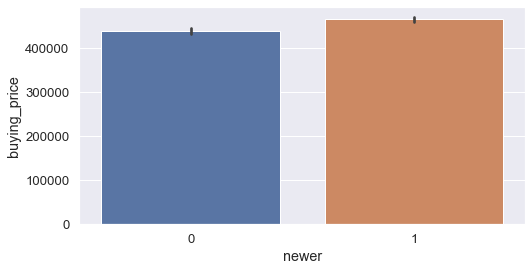

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(x='newer', y='buying_price', data=df4, estimator=np.median);

In [47]:
h3 = df4[['newer', 'buying_price']].groupby('newer').median().reset_index()
display(h3)

older = h3.iloc[0,1]
newer = h3.iloc[1,1]

percentage = abs(((newer - older) / older)*100)
print(f'Older properties are {percentage:.2f}% cheaper.')

newer  buying_price
0      0     438500.00
1      1     464950.00

Older properties are 6.03% cheaper.


Older properties (built before 1965) were expected to cost at least 35% less than newer properties. Counterintuitively, older properties are, on median, only about 6% cheaper. It is more appropriate to choose newer properties over older ones. The small price difference may not compensate for possible renovation expenses in the case of older properties. Therefore, when thinking about buying older properties, in my opinion, we should choose those in very good condition (from 4 upwards).

### **H4**. On averange, with every bedroom, the value of the properties rises 10%. 
**False**. The price for properties with up to 8 bedrooms grows more than 10%, except for properties with 6 bedrooms, which grow by 6% compared to 5 bedrooms. From 9 to 11 bedrooms the price decreases

In [48]:
h4 = df4[['bedrooms', 'buying_price']].groupby('bedrooms').mean().reset_index()
h4['diff%'] = (h4['buying_price'].pct_change())*100
h4

bedrooms  buying_price  diff%
0          0     280158.33    NaN
1          1     322183.86  15.00
2          2     402384.89  24.89
3          3     467750.83  16.24
4          4     636218.36  36.02
5          5     789354.98  24.07
6          6     839413.63   6.34
7          7     951184.66  13.32
8          8    1105076.92  16.18
9          9     893999.83 -19.10
10        10     819333.33  -8.35
11        11     520000.00 -36.53

Although our hypothesis is null, we can say that the number of bedrooms influences the price of properties, except for houses with more than 8 bedrooms. 

### **H5**. At the median, properties without a basement have a lot area at least 20% bigger than those with a basement. 
**False**. At the median, properties without a basement have a lot area just 1.67% bigger than those with a basement.

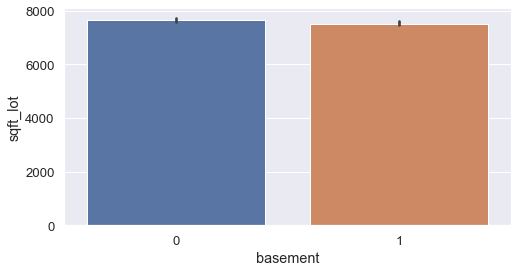

In [49]:
plt.figure(figsize=(8, 4))
sns.barplot(x= 'basement', y='sqft_lot', data=df4, estimator=np.median);

In [50]:
h5 = df4[['basement', 'sqft_lot']].groupby('basement').median().reset_index()
display(h5)

no_basement = h5.iloc[0,1]
basement    = h5.iloc[1,1]

percentage = abs(((no_basement - basement) / basement)*100)
print(f'Properties without a basement have a lot area  {percentage:.2f}% bigger.')

basement  sqft_lot
0         0   7650.00
1         1   7524.00

Properties without a basement have a lot area  1.67% bigger.


### **H6**. At the median, properties without a basement are at least 15% cheaper than those with a basement.
**True**. At the median, properties without a basement are  19.51% cheaper than those with a basement.

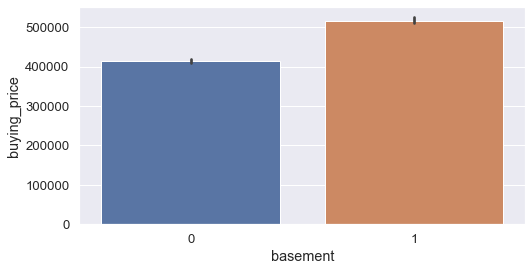

In [51]:
plt.figure(figsize=(8, 4))
sns.barplot(x= 'basement', y='buying_price', data=df4, estimator=np.median);

In [52]:
h6 = df4[['basement', 'buying_price']].groupby('basement').median().reset_index()
display(h6)

no_basement = h6.iloc[0,1]
basement    = h6.iloc[1,1]

percentage = abs(((no_basement - basement) / basement)*100)
print(f'Properties without a basement are {percentage:.2f}% cheaper.')

basement  buying_price
0         0     414950.00
1         1     515500.00

Properties without a basement are 19.51% cheaper.


It was expected that having a basement or other kind of facilities raises the price of a property. If we find properties without a basement in excellent conditions, we could buy them and build new facilities, to sell at a higher price.

### **H7**. Properties built with basement decreased after the 90s.
**False**. Properties built with basement decreased after the 80s.

In [53]:
# number properties by year built with basement
basement = df4[df4['basement'] == 1][['basement', 'yr_built']].groupby('yr_built').count().reset_index()
basement.head()

yr_built  basement
0      1900        29
1      1901        11
2      1902         5
3      1903        10
4      1904        20

In [54]:
 # number properties by year built without basement
no_basement = df4[df4['basement'] == 0][['basement', 'yr_built']].groupby('yr_built').count().reset_index().rename(columns={'basement':'no_basement'})
no_basement.head()

yr_built  no_basement
0      1900           57
1      1901           18
2      1902           22
3      1903           35
4      1904           24

In [55]:
h7 = pd.merge(basement, no_basement, on='yr_built')

In [56]:
h7.head()

yr_built  basement  no_basement
0      1900        29           57
1      1901        11           18
2      1902         5           22
3      1903        10           35
4      1904        20           24

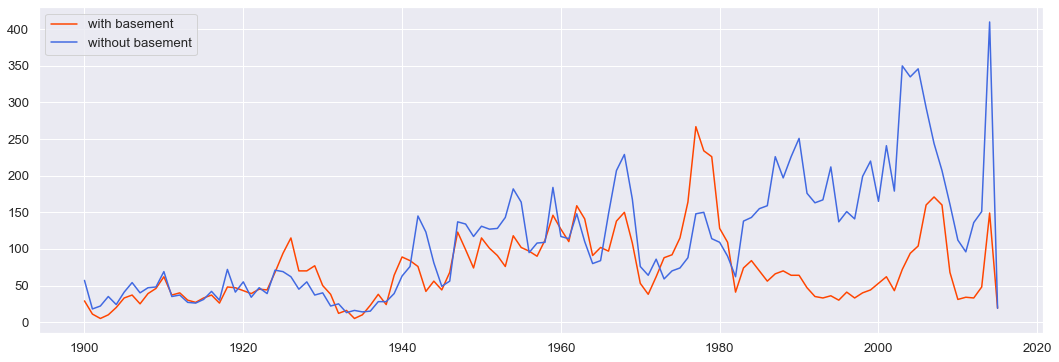

In [57]:
plt.figure(figsize=(18, 6))
plt.plot(h7['yr_built'], h7['basement'], color='orangered', label='with basement')
plt.plot(h7['yr_built'], h7['no_basement'], color='royalblue', label='without basement')
plt.legend()
plt.show()

### **H8**. The living space of the properties increased over construction year timeline.   
**True**. The interior living space of the properties increased over construction year timeline.


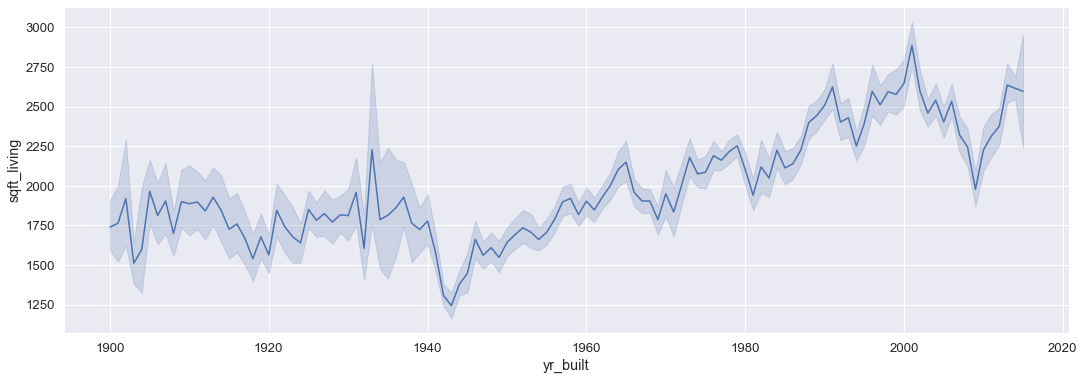

In [58]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='yr_built', y='sqft_living', data=df4);

This shows that people nowadays have a preference for bigger properties. This preference reinforces the proposal to buy newer properties. 

### **H9**. The best seasons to sell a property are spring and summer.
**False**. Prices are slightly higher in spring and summer, but when taking into account the relative deviation one median price to another, we can not say that there is better season to sell a property, more data is needed.

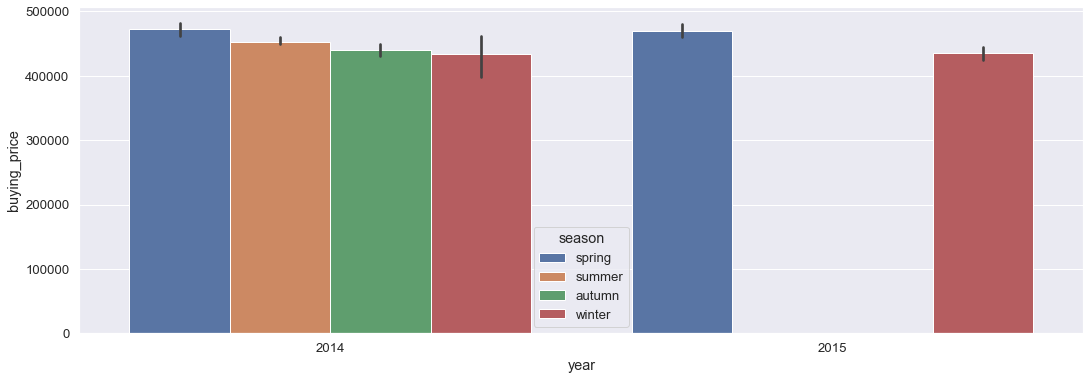

In [59]:
h9 = df4[['date','buying_price', 'season']].copy()
h9['year'] = h9['date'].apply(lambda x: x.year)

plt.figure(figsize=(18, 6))
sns.barplot(x='year', y='buying_price', hue= 'season', data=h9, estimator=np.median);

In [60]:
h9 = h9[['buying_price', 'year', 'season']].groupby(['year', 'season']).median().reset_index()
h9['buying_price'].describe()

count        6.00
mean    450400.00
std      17357.10
min     433200.00
25%     436237.50
50%     445975.00
75%     465500.00
max     472250.00
Name: buying_price, dtype: float64

 Prices are slightly higher in spring and summer, but when taking into account the relative deviation one median price to another, we can not say that there is better season to sell a property, more data is needed. With this consideration, selling a property as quickly as possible is better for increasing net working capital.

# 5.0 Business Decisions

In [61]:
df5 = df4.copy()

In [62]:
## median price by zipcode
aux1 = df5[['buying_price', 'zipcode']].groupby('zipcode').median().reset_index().rename(columns={'buying_price': 'median_price_zipcode'})

In [63]:
df5 = pd.merge(df5, aux1, on='zipcode', how='inner')

In [64]:
df5[['id', 'buying_price', 'zipcode', 'median_price_zipcode']].sample(5)

id  buying_price  zipcode  median_price_zipcode
5865   8934100125     810000.00    98115             570000.00
11314  2810100040     485000.00    98136             489950.00
11613  2944500470     257000.00    98023             269000.00
18043  8018600980     187250.00    98168             237000.00
13371   263000040     452000.00    98103             550000.00

Criteria for suggesting properties to buy:
* Property prices vary by region (zipcode), for the purchase of property, price must be below or equal the median price on the region.    
* A waterfront property, sold at a price lower than the regional median, should be purchased regardless of the condition.
* A property, which has a good view (from 3 upwards), being sold for a price lower than the regional median price, should be purchased if the if the condition is from 2 upwards.
* When thinking about buying older properties, we should choose those in very good condition (from 4 upwards).

In [65]:
## business decisions (buy x not buy)
df5['decision'] = df5[['buying_price', 
                        'median_price_zipcode', 
                        'waterfront', 
                        'view', 
                        'condition', 
                        'newer']].apply(lambda x: 1 if (((x['buying_price'] <= x['median_price_zipcode']) & (x['waterfront'] == 1)) | 
                                                        ((x['buying_price'] <= x['median_price_zipcode']) & (x['view'] >= 3) & (x['condition'] >= 2)) | 
                                                        ((x['buying_price'] <= x['median_price_zipcode']) & (x['condition'] >= 3) & (x['newer'] == 1)) |
                                                        ((x['buying_price'] <= x['median_price_zipcode']) & (x['condition'] >= 4))) else 0, axis=1)

In [66]:
df5[['id', 'buying_price', 'median_price_zipcode', 'view', 'condition', 'newer', 'decision']].sample(5)

id  buying_price  median_price_zipcode  view  condition  newer  \
11577  8731980040     295000.00             269000.00     0          4      1   
9492   4206901505     465000.00             675000.00     0          3      0   
14114  7215721070     485500.00             739999.50     0          3      1   
9585   4040400340     460000.00             560000.00     0          4      0   
21077  1853500290     314000.00             265000.00     0          3      1   

       decision  
11577         0  
9492          0  
14114         1  
9585          1  
21077         0

The maximum renovation expense varies according to the condition of the property:
* 12% for properties in a condition less than or equal to 2 (which can be only waterfront and good view properties, sold at higher prices).
* 8% for properties in a condition equal to 3.
* 6% for properties in a condition greater than or equal to 4. 

In [67]:
## maximum expenses for the renovation of a property
df5['maximal_expend'] = df5[['decision',
                             'buying_price', 
                             'condition']].apply(lambda x: x['buying_price'] * 0.12 if (x['condition'] <= 2) & (x['decision'] == 1) else
                                                           x['buying_price'] * 0.08 if (x['condition'] == 3) & (x['decision'] == 1) else
                                                           x['buying_price'] * 0.06 if  x['decision'] == 1 else 0, axis=1)

In [68]:
df5[df5['decision'] == 1][['id', 'buying_price', 'median_price_zipcode', 'view', 'condition', 'newer', 'decision', 'maximal_expend']].sample(5)

id  buying_price  median_price_zipcode  view  condition  newer  \
1375   7853320550     425000.00             500000.00     0          3      1   
13264  3363400655     549000.00             550000.00     0          5      0   
10672  2008200060     160000.00             266750.00     0          4      0   
1985    643300040     719521.00             760184.50     0          4      1   
14361  2473251090     269900.00             335000.00     0          4      1   

       decision  maximal_expend  
1375          1        34000.00  
13264         1        32940.00  
10672         1         9600.00  
1985          1        43171.26  
14361         1        16194.00

The criteria for the suggested sales price:
* 40% more than the purchase price for waterfront properties. 
* 35% more than the purchase price for properties with good views. 
* 30% more than the purchase price for properties that the purchase price plus the renovation price is lower than the median price for the region.
* 25% more than the purchase price for properties that the purchase price plus the renovation price is higher than the median price for the region.

In [69]:
## suggested selling price
df5['suggested_selling_price'] = df5[['decision',
                                      'buying_price',
                                      'median_price_zipcode',
                                      'maximal_expend',
                                      'waterfront',
                                      'view']].apply(lambda x: x['buying_price'] * 1.40 if (x['waterfront'] == 1) & (x['decision'] == 1)  else 
                                                               x['buying_price'] * 1.35 if (x['waterfront'] == 0) & (x['view'] >= 3) & (x['decision'] == 1) else 
                                                               x['buying_price'] * 1.30 if (x['waterfront'] == 0) & (x['view'] <  3) & (x['decision'] == 1) & 
                                                                                                                   ((x['buying_price'] + x['maximal_expend']) < x['median_price_zipcode']) else 
                                                               x['buying_price'] * 1.25 if (x['decision'] == 1) else 0, axis=1)

In [70]:
## expected profit
df5['expected_profit'] = df5[['decision',
                              'buying_price', 
                              'maximal_expend', 
                              'suggested_selling_price']].apply(lambda x: x['suggested_selling_price'] - x['maximal_expend'] - x['buying_price'] if (x['decision'] == 1) else 0, axis=1)

In [71]:
df5[df5['decision'] == 1][['id', 'buying_price', 'median_price_zipcode', 'view', 'condition', 'newer', 'decision', 'maximal_expend', 'suggested_selling_price', 'expected_profit']].sample(5)

id  buying_price  median_price_zipcode  view  condition  newer  \
7501   6792200282     254000.00             292500.00     0          3      1   
18194  3841600220     282500.00             312000.00     0          4      0   
2645   5711200170     535000.00             615000.00     0          3      1   
7089   1775950030     375000.00             517500.00     0          3      1   
14498  2473450870     325000.00             335000.00     0          3      1   

       decision  maximal_expend  suggested_selling_price  expected_profit  
7501          1        20320.00                330200.00         55880.00  
18194         1        16950.00                367250.00         67800.00  
2645          1        42800.00                695500.00        117700.00  
7089          1        30000.00                487500.00         82500.00  
14498         1        26000.00                406250.00         55250.00

# 6.0 Conclusion and Visualization

In [72]:
df6 = df5.copy()

In [73]:
df_tobuy = df6[df6['decision'] == 1].copy().drop(columns='decision')

In [74]:
tot_buying_price = df_tobuy['buying_price'].sum()
print(f'Total Expend in Buying Properties:  US$ {tot_buying_price:,.2f}')

tot_maximal_expend = df_tobuy['maximal_expend'].sum()
print(f'Total Maximal Expend in Renovation: US$   {tot_maximal_expend:,.2f}')

tot_maximal_investiment = tot_buying_price + tot_maximal_expend
print(f'Total Maximal of Investment:        US$ {tot_maximal_investiment:,.2f}')

tot_min_expected_profit = df_tobuy['expected_profit'].sum()
print(f'Total Expected Profit :             US$   {tot_min_expected_profit:,.2f}')

perct = np.round((tot_min_expected_profit / tot_maximal_investiment) * 100, 2)
print(f'\nProfit Percentage: {perct}%')

Total Expend in Buying Properties:  US$ 3,225,546,349.00
Total Maximal Expend in Renovation: US$   227,699,976.42
Total Maximal of Investment:        US$ 3,453,246,325.42
Total Expected Profit :             US$   702,080,905.28

Profit Percentage: 20.33%


In [75]:
## map view

## transforming features
df6['to_buy'] = df6['decision'].apply( lambda x: 'to buy' if x == 1 else 'not to buy')

## adding interactive buttons
set_style = {'description_width': 'initial'} 

# Decision to buy or not
b_to_buy = widgets.Dropdown(options = df6['to_buy'].unique().tolist(), 
                            value = 'to buy', 
                            description = 'Buying Decision:',
                            style = set_style )

# buying price limit
b_price_limit = widgets.IntSlider(value = df6['buying_price'].max(),
                                  min   = df6['buying_price'].min(),
                                  max   = df6['buying_price'].max(),
                                  step  = 100,
                                  description = 'Maximum Buying Price:',
                                  style = set_style)

# min profit limit
b_profit_limit = widgets.IntSlider(value  = df6[df6['expected_profit'] != 0]['expected_profit'].min(),
                                   min    = df6[df6['expected_profit'] != 0]['expected_profit'].min(),
                                   max    = df6['expected_profit'].max(),
                                   step   = 100,
                                   description = 'Minimum Profit:',
                                   style = set_style)


def set_map (df, c_to_buy, c_price_limit, c_profit_limit): # dataframe and conditions
    
    ## defining map dataset with conditions and columns from original dataset
    df_map = df[(df['to_buy'] == c_to_buy) & 
                (df['buying_price'] <= c_price_limit) &
                (df['expected_profit'] >= c_profit_limit)][['id', 'buying_price', 'lat', 'long', 'decision', 'maximal_expend', 
                                                          'suggested_selling_price', 'expected_profit', 'waterfront', 'view','condition']]
            
    map_plot = px.scatter_mapbox(df_map, lat='lat', lon='long', color='expected_profit',
                                 color_continuous_scale=px.colors.sequential.Rainbow,
                                 size='buying_price', zoom=10, size_max=15,
                                 hover_data = ['maximal_expend', 'suggested_selling_price', 'waterfront', 'view', 'condition'])
     
                                
    map_plot.update_layout(mapbox_style = 'open-street-map', height = 600, 
                           margin={'r':0, 't':0, 'l':0,'b':0})
    
    expected_profit = df_map['expected_profit'].sum()
    print(f'Expected Profit for selected features: US$ {expected_profit:,.2f}')
 
    map_plot.show()
    

widgets.interactive(set_map, df=fixed(df6), 
                    c_to_buy = b_to_buy,
                    c_price_limit = b_price_limit,
                    c_profit_limit = b_profit_limit)

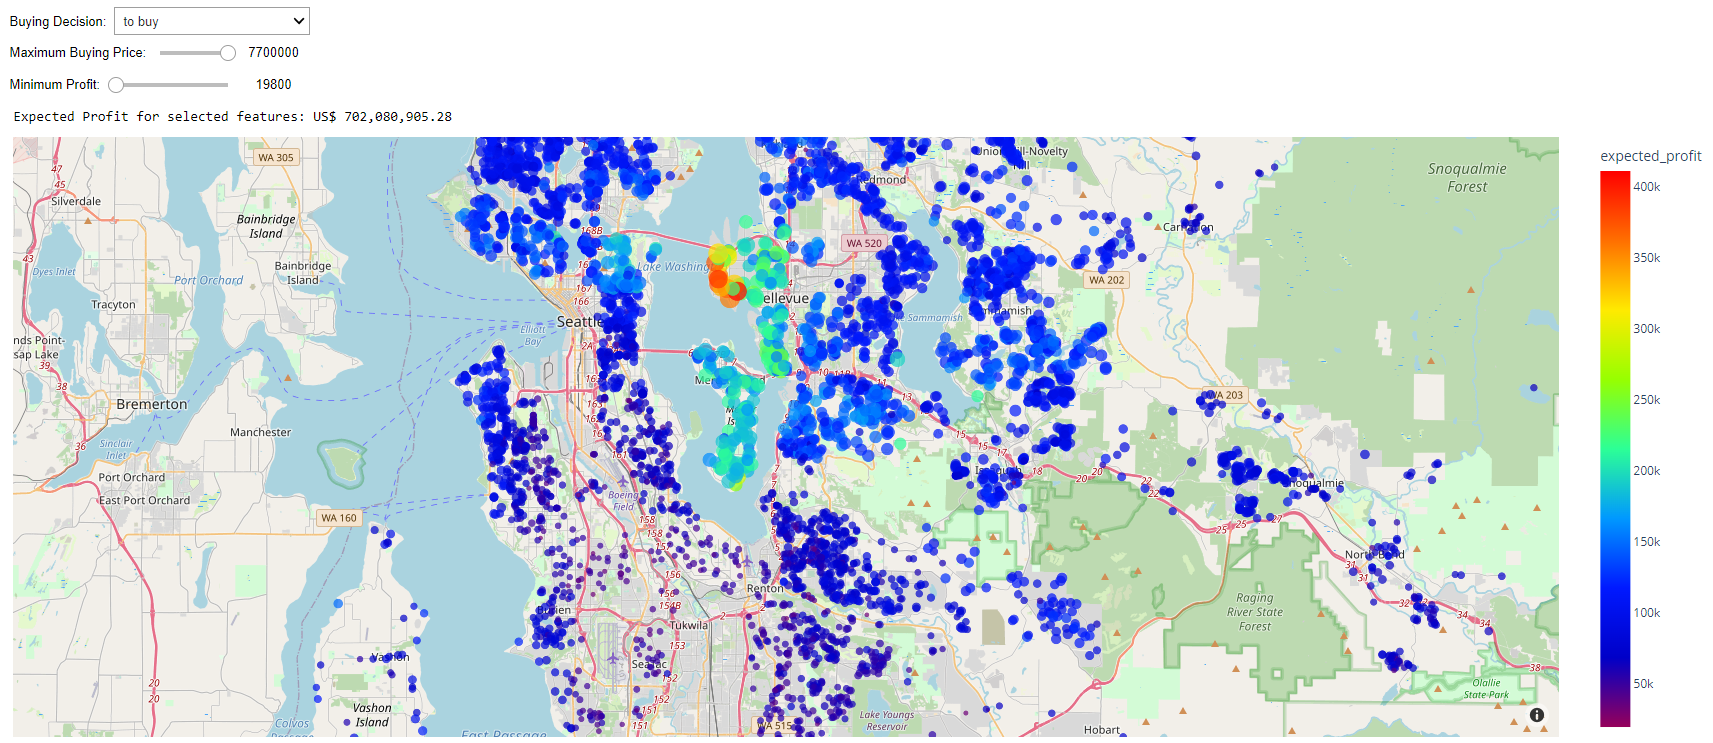

In [76]:
Image('images/buying_decision.png')

In [77]:
## Saving decision dataframe
df6.to_csv('datasets/df_decision.csv', index=False)

In [78]:
## Saving to buy dataframe
df_tobuy.to_csv('datasets/df_tobuy.csv', index=False)